## Infinitos

Las funciones en generan están definidas en un _dominio_ como hemos visto antes, algunas de regresan un _codominio_ que tiene como limite el _infinito positivo_ $+ \infty$, _infinito negativo_ $-\infty$ o ambos. En este caso es interesante ver con que velocidad esta función llega alguno de estos limites.  
Ahora pongamos un ejemplo un tema que esta de moda, como es el _Coronavirus (2019-nCoV)_ ~(al menos para el momento que escribo esto)~ y vamos a imaginar que tenemos una funciones que definen el número de infectados nuevos a lo largo de los días, veamos este ejemplo.

### Coronavirus

Vamos a imaginar que tenemos un par de funciones que nos muestran el número de infectados nuevo por cada uno de los días, desde que aparecío la infección. Y nuestro trabajo sería ver cuál sería el mejor escenario en terminos de contener el virus a partir la velocidades de cada una de las funciones.

1. **Lineal:** Supongamos que tiene un comportamiento lineal, por ejemplo: $$ I_{lineal}(d) = I_{1}(d) = 1200d $$
2. **Cuadratica:** Ahora un comportamiento cuadratico, por ejemplo:  $$ I_{cuadratico}(d) = I_{2}(d) = 24d^{2} $$
3. **Potencia de si misma:** Ahora un compartamiento donde la variable es potencia de si misma, por ejemplo:  $$ I_{potencia}(d) = I_{3}(d) = \frac{5}{9}d^{\frac{d}{2}} $$  

4. **Exponencial:** Como sería si fuera una exponencial, por ejemplo:  $$ I_{exponencial}(d) = I_{4}(d) = e^{d} $$
5. **Logarítmica:** Ahora como si fuera una logarítmica, por ejemplo:  $$ I_{logaritmica}(d) = I_{5}(d) = \log_{2}200d $$  
  
  
Ahora veamos como se vería a lo largo de los 10 primeros días de infección el número de infectados para cada uno de las posibles funciones utilizadas para describir el comportamiento.

In [1]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

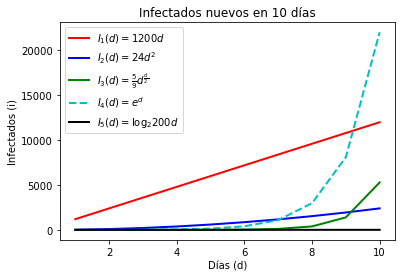

In [2]:
dias = np.arange(1, stop=11) #No inclusivo limite superior.
i1 = 1200 * dias
exponentes = np.repeat(2, len(dias))
i2 = 24 * np.power(dias, exponentes) 
i3 =  np.power(dias * (5.0/9.0), dias * (1.0/2.0)) 
i4 =  np.exp(dias)
i5 = np.log2(dias*200)

plt.figure()
plt.title('Infectados nuevos en 10 días')
plt.xlabel('Días (d)')
plt.ylabel('Infectados (i)')
hi1, = plt.plot(dias, i1, 'r-',  linewidth=2, label=r'$I_{1}(d) = 1200d$')
hi2, = plt.plot(dias, i2, 'b-',  linewidth=2, label=r'$I_{2}(d) = 24d^{2}$')
hi3, = plt.plot(dias, i3, 'g-', linewidth=2, label=r'$I_{3}(d) = \frac{5}{9}d^{\frac{d}{2}}$')
hi4, = plt.plot(dias, i4, 'c--', linewidth=2, label=r'$I_{4}(d) = e^{d}$')
hi5, = plt.plot(dias, i5, 'k-',  linewidth=2, label=r'$I_{5}(d) = \log_{2}200d$')
plt.legend(handles=[hi1,hi2,hi3,hi4,hi5])

Al revisar esta parte de la gráfica creeríamos que la funcion $i_{4}$ tendría el comportamiento **más agresivo de todos** y que este nos llevaría rápidamente a un _mundo apocalíptico_. Pero demos una mirada más cerca y revisemos el comportamiento de **la velocidad de la función** haciendo uso de la derivada.

In [8]:
from sympy import Symbol
from sympy import diff
from sympy import E
from sympy import log
from sympy import latex

d = Symbol("d")
i1 = 1200 * d
i2 = 24 * d ** 2
i3 = (5/9) * d ** (d/2)
i4 = E ** d
i5 = log(200*d, 2)

df1 = diff(i1, d)
df2 = diff(i2, d)
df3 = diff(i3, d)
df4 = diff(i4, d)
df5 = diff(i5, d)

print(f' derivada 1 es: {latex(df1)}')
print(f' derivada 2 es: {latex(df2)}')
print(f' derivada 3 es: {latex(df3)}')
print(f' derivada 4 es: {latex(df4)}')
print(f' derivada 5 es: {latex(df5)}')

 derivada 1 es: 1200
 derivada 2 es: 48 d
 derivada 3 es: 0.555555555555556 d^{\frac{d}{2}} \left(\frac{\log{\left(d \right)}}{2} + \frac{1}{2}\right)
 derivada 4 es: e^{d}
 derivada 5 es: \frac{1}{d \log{\left(2 \right)}}


Ahora gracias a `Sympy` cálculamos las derivadas para cada una de las funciones, veamos cuales fueron las funciones que encontramos en cada uno de los casos.

$$I_{1}^{'} = 1200$$

$$I_{2}^{'} = 48 d$$

$$I_{3}^{'} = \frac{5}{9} d^{\frac{d}{2}} \left(\frac{\log{\left(d \right)}}{2} + \frac{1}{2}\right)$$

$$I_{4}^{'} = e^{d}$$

$$I_{4}^{'} = \frac{1}{d \log{\left(2 \right)}}$$

Veamos como cada una de estas funciones se ven en una gráfica y cuál presenta un mayor crecimiento (acelaración, que sería la segunda derivada, pero ya eso es otro tema).

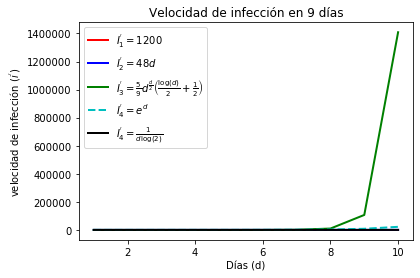

In [29]:
dias = np.arange(1, stop=11) #No inclusivo limite superior.
i1 = np.repeat(1200, len(dias))
i2 = 48 * dias 
i3 =  np.power(dias * (5.0/9.0), dias * (1.0/2.0) * ((np.log(dias) * (1.0/2.0)) +  (1.0/2.0))) 
i4 =  np.exp(dias)
i5 = 1 / (dias * np.log(2))

plt.figure()
plt.title('Velocidad de infección en 9 días')
plt.xlabel('Días (d)')
plt.ylabel(r"velocidad de infección $(i^{'})$")
hi1, = plt.plot(dias, i1, 'r-',  linewidth=2, label=r"$I_{1}^{'} = 1200$")
hi2, = plt.plot(dias, i2, 'b-',  linewidth=2, label=r"$I_{2}^{'} = 48 d$")
hi3, = plt.plot(dias, i3, 'g-', linewidth=2, label=r"$I_{3}^{'} = \frac{5}{9} d^{\frac{d}{2}} \left(\frac{\log{\left(d \right)}}{2} + \frac{1}{2}\right)$")
hi4, = plt.plot(dias, i4, 'c--', linewidth=2, label=r"$I_{4}^{'} = e^{d}$")
hi5, = plt.plot(dias, i5, 'k-',  linewidth=2, label=r"$I_{4}^{'} = \frac{1}{d \log{\left(2 \right)}}$")
plt.legend(handles=[hi1,hi2,hi3,hi4,hi5])


Así que como lo pudieron notar la velocidad con la que se acerca hacia el infinito la función $i_{3}$ es mayor a la velocidad de la función $i_{4}$, de ahí a que las apariencias engañan y que sea interesante analizar con que velocidad crece una función. Volviendo al ejemplo, lo que estamos notando es que aunque para el día 10 el número de infectados sea menor con $i_{3}$ a lo largo del tiempo la infección se va propagar más rápido que con las demás.  
Pero para responder la pregunta cual sería el mejor escenario para contener la enfermedad, esta claro que $i_{5}$ sería nuestra mejor salvación.